In [1]:
import numpy as np
import matplotlib.pyplot as plt



### Let's create a Ratio plot

In [2]:
a = np.random.normal(40, 10, 10000)
b = np.random.normal(60, 20, 10000)
c = np.random.normal(80, 30, 10000)

/home/johan/anaconda3/envs/lumin/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/home/johan/anaconda3/envs/lumin/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


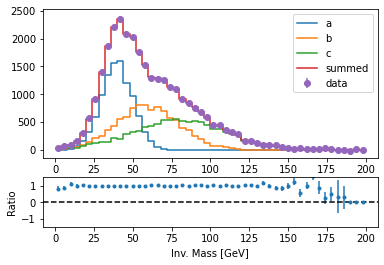

In [3]:
n_a, bins_a = np.histogram(a,range=(0, 200), bins=50)
n_b, bins_b = np.histogram(b,range=(0, 200), bins=50)
n_c, bins_c = np.histogram(c,range=(0, 200), bins=50)

centers = (bins_a[:-1] + bins_a[1:]) / 2
fig, axs = plt.subplots(2,1, gridspec_kw={'height_ratios':[3, 1]})
axs[0].step(centers, n_a, label='a', where='mid')
axs[0].step(centers, n_b, label='b', where='mid')
axs[0].step(centers, n_c, label='c', where='mid')
axs[0].step(centers, n_a + n_b + n_c, label='summed', where='mid')
noise = np.random.normal(0, 1, len(centers))*10
axs[0].errorbar(centers, n_a + n_b + n_c+noise, yerr=np.sqrt(n_a + n_b + n_c+noise), fmt='o', label='data')
axs[0].legend()

ratio = (n_a + n_b + n_c)/(n_a + n_b + n_c+noise)
axs[1].errorbar(centers, ratio,yerr = 1/np.sqrt((n_a+n_b+n_c)),fmt='.', label='ratio', )
axs[1].set_ylim([-1.5, 1.5])
axs[1].set_xlabel('Inv. Mass [GeV]')
axs[1].set_ylabel('Ratio')
axs[1].axhline(0, color='k', linestyle='--')
plt.show()

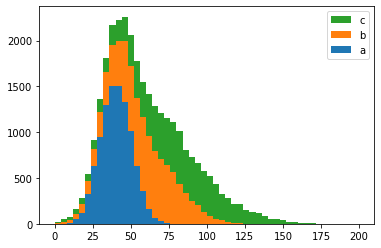

In [41]:
# lett's make a stacked histogram
n, bins, edges = plt.hist([a, b, c],range=(0, 200), bins=50, histtype='stepfilled', label=['a', 'b', 'c'], stacked=True)
plt.legend()
plt.show()

In [5]:
import uproot

In [45]:
dy = uproot.open("./Data/DY.root")
st = uproot.open("./Data/ST.root")
wjets = uproot.open("./Data/WJets.root")
signal = uproot.open("./Data/Signal.root")

data = uproot.open("./Data/Data.root")

In [90]:
len(dy['tout']['invMass'].array())

637

In [92]:
print(len(st['tout']['invMass'].array()))
print(len(wjets['tout']['invMass'].array()))
print(len(signal['tout']['invMass'].array()))

39575
102
1461276


In [96]:
n_data, bins_data = data['Muon_Electron_invariant_mass'].numpy()
print(sum(n_data))

457573.0


In [46]:
inv_mass = data['Muon_Electron_invariant_mass'].numpy()

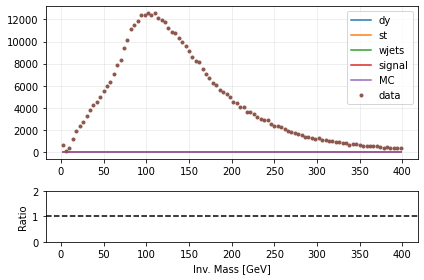

In [99]:
inv_mass_dy = dy['tout']['invMass'].array()
weight_dy = dy['tout']['Weight'].array()/1000.
inv_mass_st = st['tout']['invMass'].array()
weight_st = st['tout']['Weight'].array()/1000.
inv_mass_wjets = wjets['tout']['invMass'].array()
weight_wjets = wjets['tout']['Weight'].array()/1000.
inv_mass_signal = signal['tout']['invMass'].array()
weight_signal = signal['tout']['Weight'].array()/1000.

n_dy, bins_dy = np.histogram(inv_mass_dy,range=(0, 400), bins=100, weights=weight_dy)
n_st, bins_st = np.histogram(inv_mass_st,range=(0, 400), bins=100, weights=weight_st)
n_wjets, bins_wjets = np.histogram(inv_mass_wjets,range=(0, 400), bins=100, weights=weight_wjets)
n_signal, bins_signal = np.histogram(inv_mass_signal,range=(0, 400), bins=100, weights=weight_signal)

n_data, bins_data = data['Muon_Electron_invariant_mass'].numpy()

centers = (bins_dy[:-1] + bins_dy[1:]) / 2
fig, axs = plt.subplots(2,1, gridspec_kw={'height_ratios':[3, 1]})
axs[0].step(centers, n_dy, label='dy', where='mid')
axs[0].step(centers, n_st, label='st', where='mid')
axs[0].step(centers, n_wjets, label='wjets', where='mid')
axs[0].step(centers, n_signal, label='signal', where='mid')

axs[0].step(centers, (n_dy+n_st+n_wjets+n_signal), label='MC', where='mid')

axs[0].plot(centers, n_data,'.', label='data', )
axs[0].grid(alpha=0.25)
axs[0].legend()


ratio = (n_data)/(n_dy+n_st+n_wjets+n_signal)

N = (n_data+(n_dy+n_st+n_wjets+n_signal))/2.
axs[1].errorbar(centers, ratio,yerr = 1/np.sqrt(N),fmt='.', label='ratio', )
axs[1].set_ylim([0, 2])
axs[1].set_xlabel('Inv. Mass [GeV]')
axs[1].set_ylabel('Ratio')
axs[1].axhline(1, color='k', linestyle='--')

plt.tight_layout()
plt.savefig('./ratio.pdf')
plt.show()

/home/johan/anaconda3/envs/lumin/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


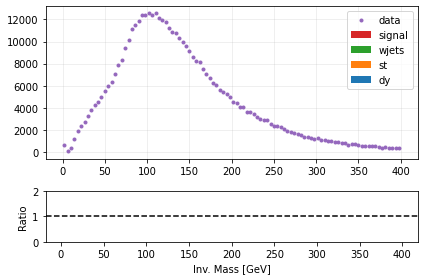

In [103]:
fig, axs = plt.subplots(2,1, gridspec_kw={'height_ratios':[3, 1]})
n, bins, edges = axs[0].hist([inv_mass_dy, inv_mass_st, inv_mass_wjets, inv_mass_signal],
range=(0, 400), bins=100, histtype='stepfilled', label=['dy', 'st', 'wjets', 'signal'],
weights = [weight_dy/1000, weight_st/1000, weight_wjets/1000, weight_signal/1000], stacked=True)
axs[0].plot(centers, n_data,'.', label='data', )
axs[0].grid(alpha=0.25)
axs[0].legend()


ratio = (n_data)/(n_dy+n_st+n_wjets+n_signal)

N = (n_data+(n_dy+n_st+n_wjets+n_signal))/2.
axs[1].errorbar(centers, ratio,yerr = 1/np.sqrt(N),fmt='.', label='ratio', )
axs[1].set_ylim([0, 2])
axs[1].set_xlabel('Inv. Mass [GeV]')
axs[1].set_ylabel('Ratio')
axs[1].axhline(1, color='k', linestyle='--')
plt.tight_layout()
plt.savefig('./ratio_stacked.pdf')
plt.show()

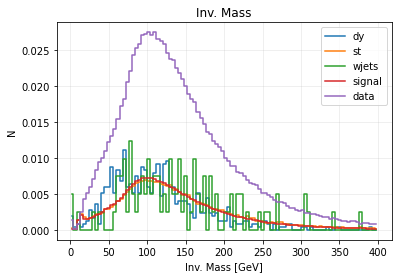

In [106]:
#make uniity plots
inv_mass_dy = dy['tout']['invMass'].array()
weight_dy = dy['tout']['Weight'].array()
inv_mass_st = st['tout']['invMass'].array()
weight_st = st['tout']['Weight'].array()
inv_mass_wjets = wjets['tout']['invMass'].array()
weight_wjets = wjets['tout']['Weight'].array()
inv_mass_signal = signal['tout']['invMass'].array()
weight_signal = signal['tout']['Weight'].array()

n_dy, bins_dy = np.histogram(inv_mass_dy,range=(0, 400), bins=100, density=True)
n_st, bins_st = np.histogram(inv_mass_st,range=(0, 400), bins=100, density=True)
n_wjets, bins_wjets = np.histogram(inv_mass_wjets,range=(0, 400), bins=100, density=True)
n_signal, bins_signal = np.histogram(inv_mass_signal,range=(0, 400), bins=100, density=True)

n_data, bins_data = data['Muon_Electron_invariant_mass'].numpy()

n_data = n_data/np.sum(n_data)

centers = (bins_dy[:-1] + bins_dy[1:]) / 2
plt.figure()
plt.step(centers, n_dy, label='dy', where='mid')
plt.step(centers, n_st, label='st', where='mid')
plt.step(centers, n_wjets, label='wjets', where='mid')
plt.step(centers, n_signal, label='signal', where='mid')
plt.step(centers, n_data, label='data', where='mid')
plt.ylabel('N')
plt.xlabel("Inv. Mass [GeV]")
plt.grid(alpha=0.25)
plt.title("Inv. Mass")
plt.legend()
plt.savefig('./inv_mass_unity.pdf')
plt.show()

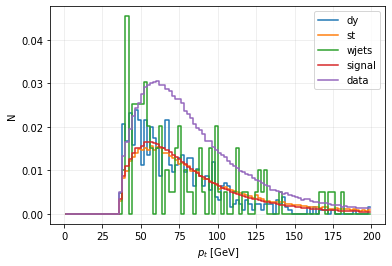

In [107]:

#make uniity plots
inv_mass_dy = dy['tout']['leading_lepton_pt'].array()
weight_dy = dy['tout']['Weight'].array()
inv_mass_st = st['tout']['leading_lepton_pt'].array()
weight_st = st['tout']['Weight'].array()
inv_mass_wjets = wjets['tout']['leading_lepton_pt'].array()
weight_wjets = wjets['tout']['Weight'].array()
inv_mass_signal = signal['tout']['leading_lepton_pt'].array()
weight_signal = signal['tout']['Weight'].array()

n_dy, bins_dy = np.histogram(inv_mass_dy,range=(0, 200), bins=100, density=True)
n_st, bins_st = np.histogram(inv_mass_st,range=(0, 200), bins=100, density=True)
n_wjets, bins_wjets = np.histogram(inv_mass_wjets,range=(0, 200), bins=100, density=True)
n_signal, bins_signal = np.histogram(inv_mass_signal,range=(0, 200), bins=100, density=True)

n_data, bins_data = data['leading_lepton_pt'].numpy()

n_data = n_data/np.sum(n_data)

centers = (bins_dy[:-1] + bins_dy[1:]) / 2
plt.figure()
plt.step(centers, n_dy, label='dy', where='mid')
plt.step(centers, n_st, label='st', where='mid')
plt.step(centers, n_wjets, label='wjets', where='mid')
plt.step(centers, n_signal, label='signal', where='mid')
plt.step(centers, n_data, label='data', where='mid')
plt.ylabel('N')
plt.xlabel("$p_{t}$ [GeV]")
plt.grid(alpha=0.25)
plt.legend()
plt.savefig("./pt_uniity.pdf")
plt.show()

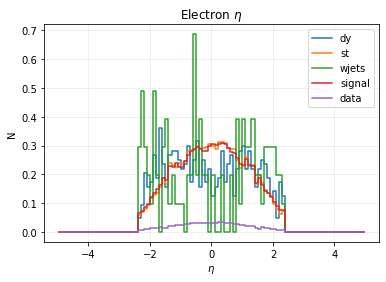

In [108]:


#make uniity plots
inv_mass_dy = dy['tout']['electron_eta'].array()
weight_dy = dy['tout']['Weight'].array()
inv_mass_st = st['tout']['electron_eta'].array()
weight_st = st['tout']['Weight'].array()
inv_mass_wjets = wjets['tout']['electron_eta'].array()
weight_wjets = wjets['tout']['Weight'].array()
inv_mass_signal = signal['tout']['electron_eta'].array()
weight_signal = signal['tout']['Weight'].array()

n_dy, bins_dy = np.histogram(inv_mass_dy,range=(-5,5), bins=100, density=True)
n_st, bins_st = np.histogram(inv_mass_st,range=(-5,5), bins=100, density=True)
n_wjets, bins_wjets = np.histogram(inv_mass_wjets,range=(-5,5), bins=100, density=True)
n_signal, bins_signal = np.histogram(inv_mass_signal,range=(-5,5), bins=100, density=True)

n_data, bins_data = data['h_Electron_eta'].numpy()

n_data = n_data/np.sum(n_data)

centers = (bins_dy[:-1] + bins_dy[1:]) / 2
plt.figure()
plt.step(centers, n_dy, label='dy', where='mid')
plt.step(centers, n_st, label='st', where='mid')
plt.step(centers, n_wjets, label='wjets', where='mid')
plt.step(centers, n_signal, label='signal', where='mid')
plt.step(centers, n_data, label='data', where='mid')
plt.ylabel('N')
plt.xlabel("$\eta$")
plt.title("Electron $\eta$")
plt.grid(alpha=0.25)
plt.legend()
plt.savefig("./eta_unity.pdf")
plt.show()

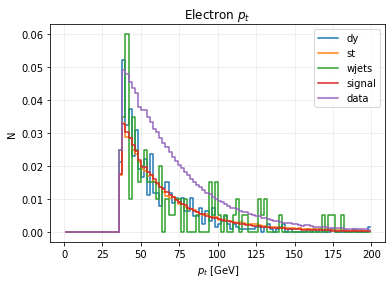

In [111]:

inv_mass_dy = dy['tout']['electron_pt'].array()
weight_dy = dy['tout']['Weight'].array()
inv_mass_st = st['tout']['electron_pt'].array()
weight_st = st['tout']['Weight'].array()
inv_mass_wjets = wjets['tout']['electron_pt'].array()
weight_wjets = wjets['tout']['Weight'].array()
inv_mass_signal = signal['tout']['electron_pt'].array()
weight_signal = signal['tout']['Weight'].array()

n_dy, bins_dy = np.histogram(inv_mass_dy,range=(0,200), bins=100, density=True)
n_st, bins_st = np.histogram(inv_mass_st,range=(0,200), bins=100, density=True)
n_wjets, bins_wjets = np.histogram(inv_mass_wjets,range=(0,200), bins=100, density=True)
n_signal, bins_signal = np.histogram(inv_mass_signal,range=(0,200), bins=100, density=True)

n_data, bins_data = data['h_Electron_pt'].numpy()

n_data = n_data/np.sum(n_data)

centers = (bins_dy[:-1] + bins_dy[1:]) / 2
plt.figure()
plt.step(centers, n_dy, label='dy', where='mid')
plt.step(centers, n_st, label='st', where='mid')
plt.step(centers, n_wjets, label='wjets', where='mid')
plt.step(centers, n_signal, label='signal', where='mid')
plt.step(centers, n_data, label='data', where='mid')
plt.ylabel('N')
plt.xlabel("$p_{t}$ [GeV]")
plt.grid(alpha=0.25)
plt.legend()
plt.title("Electron $p_{t}$")
plt.savefig("./electron_pt_unity.pdf")
plt.show()

In [74]:
dy['tout'].keys()

[b'leading_lepton_pt',
 b'invMass',
 b'electron_eta',
 b'electron_pt',
 b'muon_eta',
 b'muon_pt',
 b'genEventSumw',
 b'IntLumi',
 b'xs',
 b'Weight']

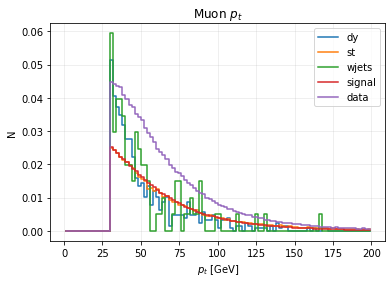

In [110]:

inv_mass_dy = dy['tout']['muon_pt'].array()
weight_dy = dy['tout']['Weight'].array()
inv_mass_st = st['tout']['muon_pt'].array()
weight_st = st['tout']['Weight'].array()
inv_mass_wjets = wjets['tout']['muon_pt'].array()
weight_wjets = wjets['tout']['Weight'].array()
inv_mass_signal = signal['tout']['muon_pt'].array()
weight_signal = signal['tout']['Weight'].array()

n_dy, bins_dy = np.histogram(inv_mass_dy,range=(0,200), bins=100, density=True)
n_st, bins_st = np.histogram(inv_mass_st,range=(0,200), bins=100, density=True)
n_wjets, bins_wjets = np.histogram(inv_mass_wjets,range=(0,200), bins=100, density=True)
n_signal, bins_signal = np.histogram(inv_mass_signal,range=(0,200), bins=100, density=True)

n_data, bins_data = data['h_Muon_pt'].numpy()

n_data = n_data/np.sum(n_data)

centers = (bins_dy[:-1] + bins_dy[1:]) / 2
plt.figure()
plt.step(centers, n_dy, label='dy', where='mid')
plt.step(centers, n_st, label='st', where='mid')
plt.step(centers, n_wjets, label='wjets', where='mid')
plt.step(centers, n_signal, label='signal', where='mid')
plt.step(centers, n_data, label='data', where='mid')
plt.ylabel('N')
plt.xlabel("$p_{t}$ [GeV]")
plt.grid(alpha=0.25)
plt.legend()
plt.title("Muon $p_{t}$")
plt.savefig("./Muon_pt_unity.pdf")
plt.show()

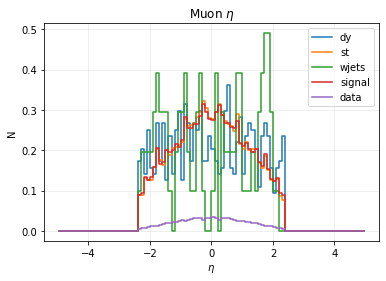

In [112]:


#make uniity plots
inv_mass_dy = dy['tout']['muon_eta'].array()
weight_dy = dy['tout']['Weight'].array()
inv_mass_st = st['tout']['muon_eta'].array()
weight_st = st['tout']['Weight'].array()
inv_mass_wjets = wjets['tout']['muon_eta'].array()
weight_wjets = wjets['tout']['Weight'].array()
inv_mass_signal = signal['tout']['muon_eta'].array()
weight_signal = signal['tout']['Weight'].array()

n_dy, bins_dy = np.histogram(inv_mass_dy,range=(-5,5), bins=100, density=True)
n_st, bins_st = np.histogram(inv_mass_st,range=(-5,5), bins=100, density=True)
n_wjets, bins_wjets = np.histogram(inv_mass_wjets,range=(-5,5), bins=100, density=True)
n_signal, bins_signal = np.histogram(inv_mass_signal,range=(-5,5), bins=100, density=True)

n_data, bins_data = data['h_Muon_eta'].numpy()

n_data = n_data/np.sum(n_data)

centers = (bins_dy[:-1] + bins_dy[1:]) / 2
plt.figure()
plt.step(centers, n_dy, label='dy', where='mid')
plt.step(centers, n_st, label='st', where='mid')
plt.step(centers, n_wjets, label='wjets', where='mid')
plt.step(centers, n_signal, label='signal', where='mid')
plt.step(centers, n_data, label='data', where='mid')
plt.ylabel('N')
plt.xlabel("$\eta$")
plt.title("Muon $\eta$")
plt.grid(alpha=0.25)
plt.legend()
plt.savefig("./eta_unity.pdf")
plt.show()

In [76]:
data.keys()

[b'h_Muon_eta;1',
 b'h_Muon_pt;1',
 b'h_Electron_eta;1',
 b'h_Electron_pt;1',
 b'Muon_Electron_invariant_mass;1',
 b'leading_lepton_pt;1']